# Ensemble Techniques

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

### 1.	Load the data (Parkinson.csv) file and perform the following task

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv("parkinson.csv")
data.head(3)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
192           0.00008   0.00624   0.00564     0.01873       0.02308    ...      
193           0.00004   0.00370   0.00390     0.01109       0.02296    ...      
194           0.00003   0.00295   0.00317     0.00885       0.01884    ...      

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[3 rows x 24 columns]

# a)	Refer to this link, https://archive.ics.uci.edu/ml/datasets/parkinsons and read the description of the dataset and attach suitable headers.

In [4]:
data.shape

(195, 24)

In [3]:
data.info() # only name is object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

There are no null values

In [19]:
data.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

We can observe there are no high outliers to deal with

In [11]:
data.rename(columns={'MDVP:Fo(Hz)': 'avg_freq', 'MDVP:Fhi(Hz)': 'max_freq','MDVP:Flo(Hz)':'min_freq','DFA':'signalscaling'}, inplace=True)

In [13]:
data.head(2)

name  avg_freq  max_freq  min_freq  MDVP:Jitter(%)  \
0  phon_R01_S01_1   119.992   157.302    74.997         0.00784   
1  phon_R01_S01_2   122.400   148.650   113.819         0.00968   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109       0.04374    ...      
1           0.00008   0.00465   0.00696     0.01394       0.06134    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE  signalscaling   spread1  \
0      0.06545  0.02211  21.033       1  0.414783       0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359       0.819521 -4.075192   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  

[2 rows x 24 columns]

# b)	Status is the outcome variable, with ‘0’ – healthy and ‘1’ – Parkinson Disease. Perform EDA and apply suitable algorithm (pick among Logistic Regression, Naive’s Bayes, KNN), which is giving best score with 70/30 validation split with precision and recall score, ROC curve and AUC value. Finally, choose the best model out of 3.

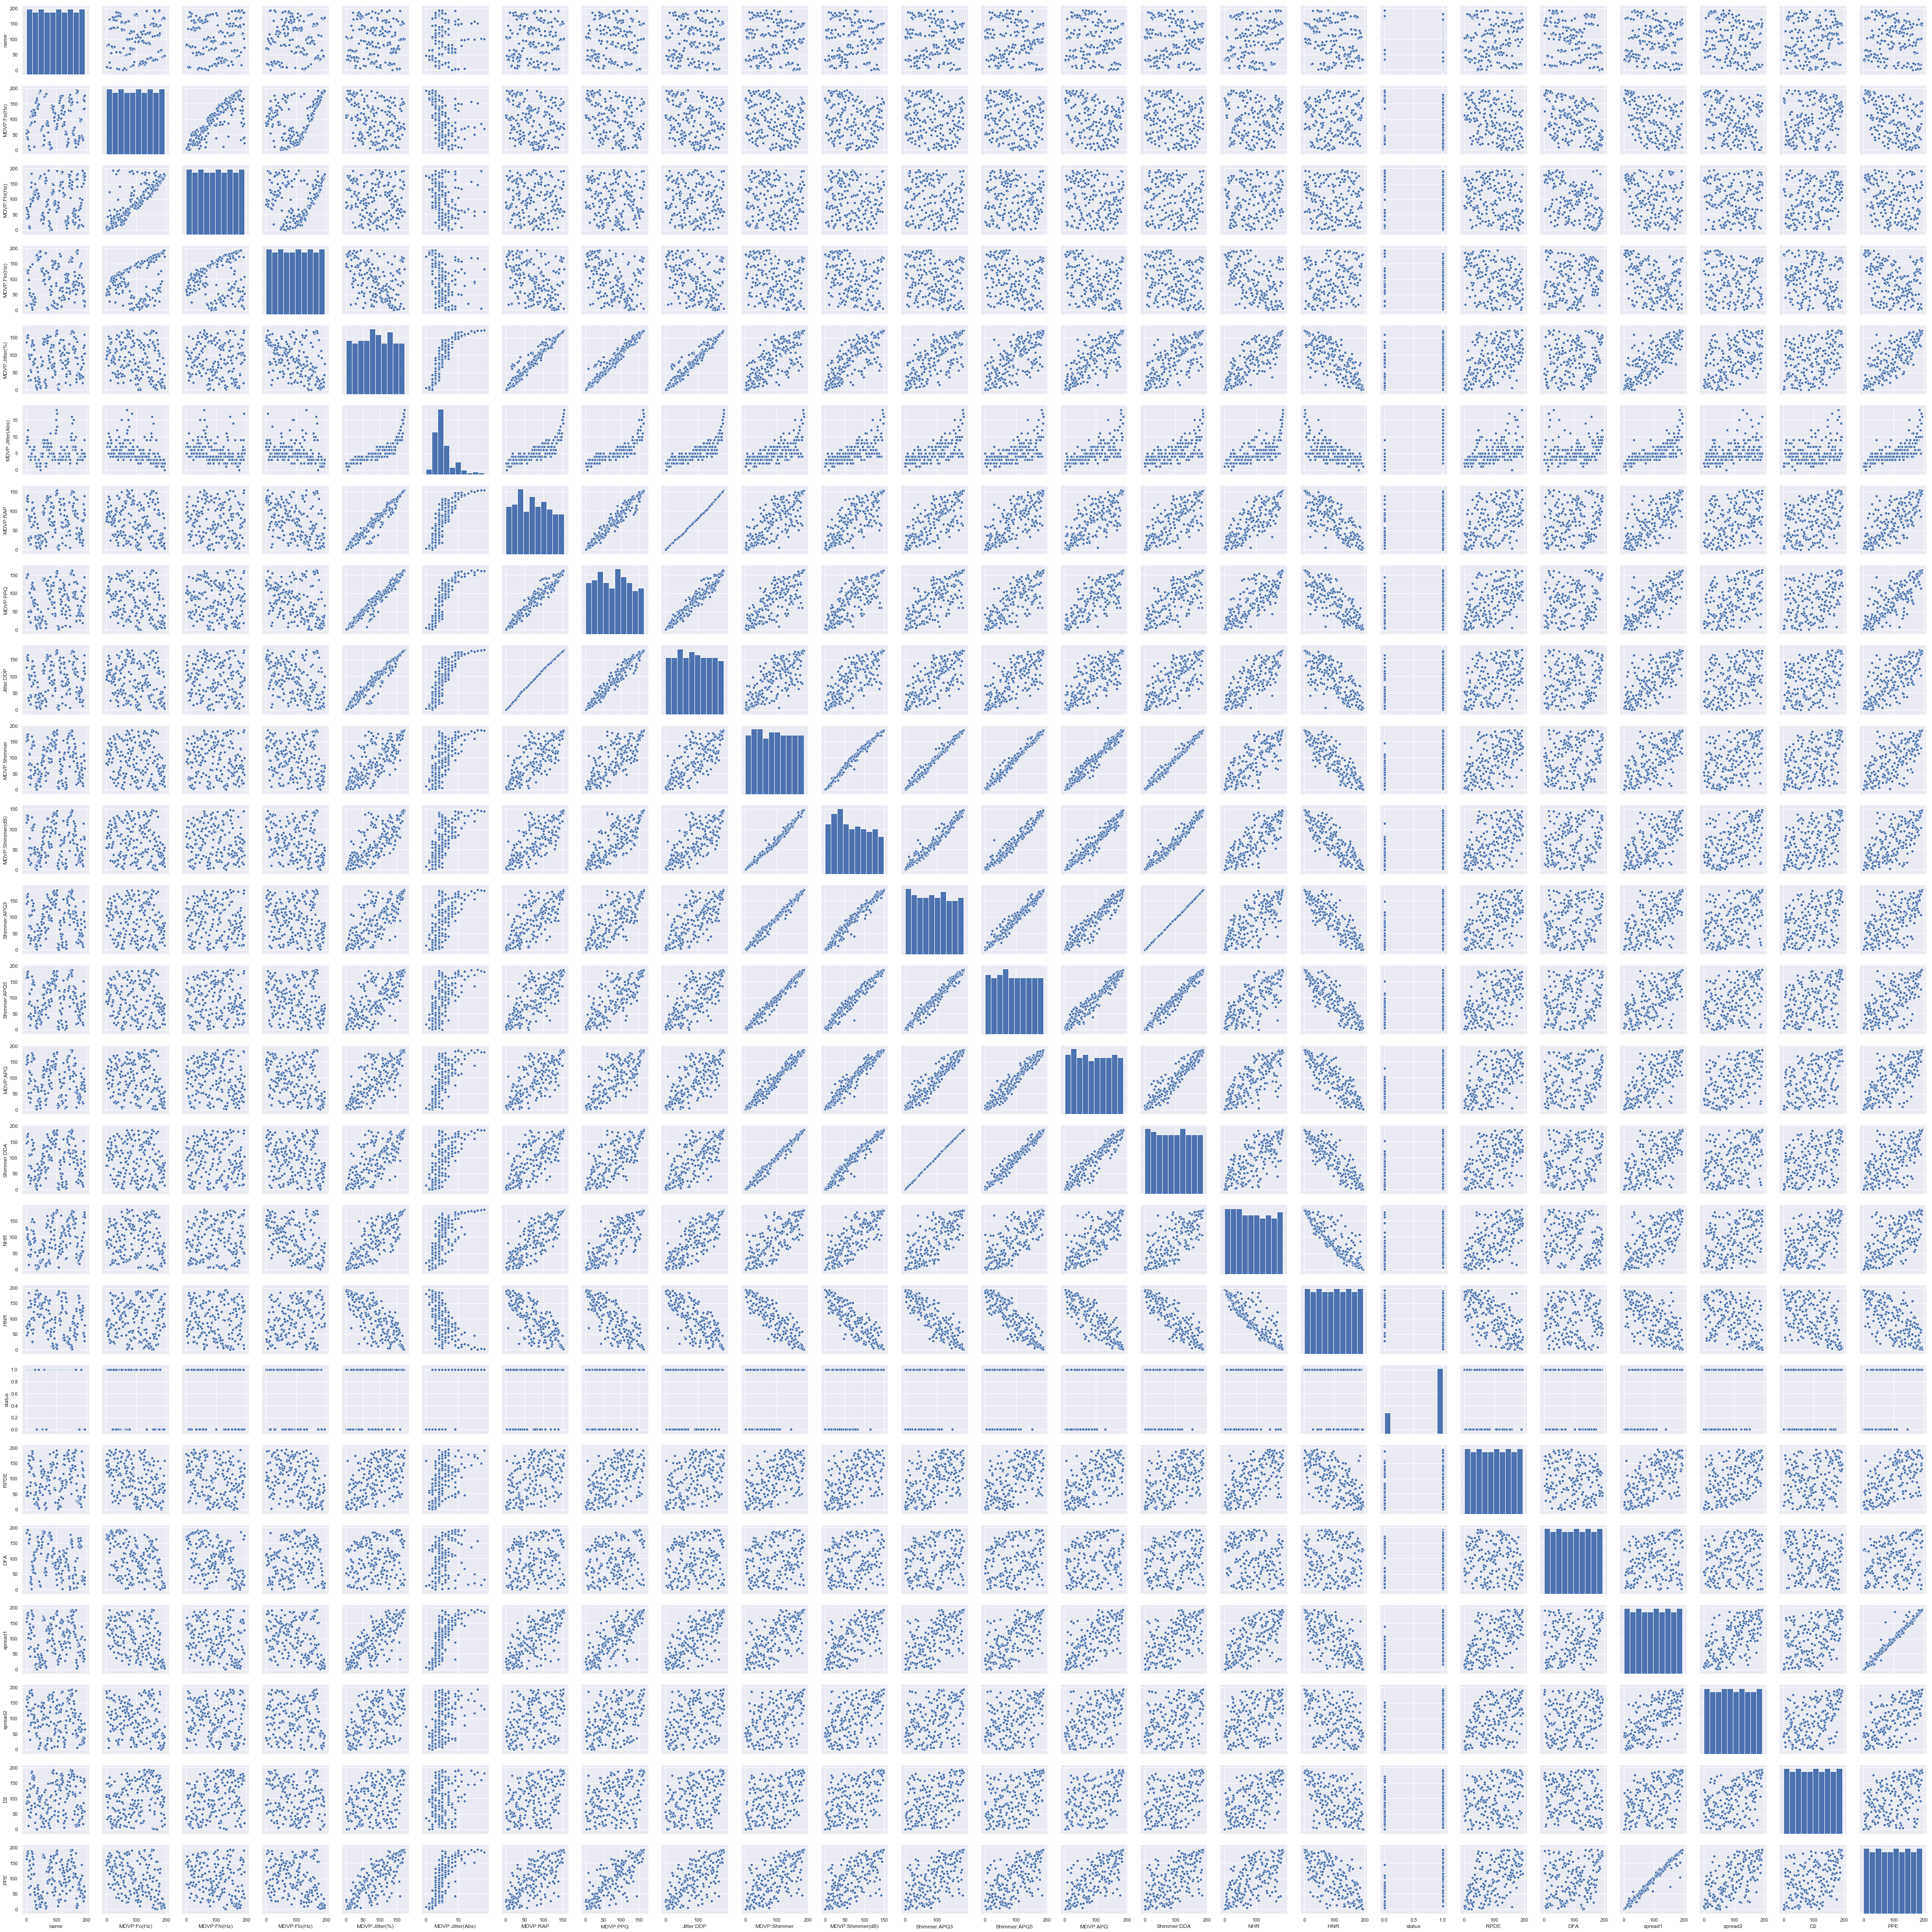

In [82]:
#pair plot
import seaborn as sns
sns.set()
sns.pairplot(data)    #multicollinearity exists
#Which can be dealed by bagging & boosting

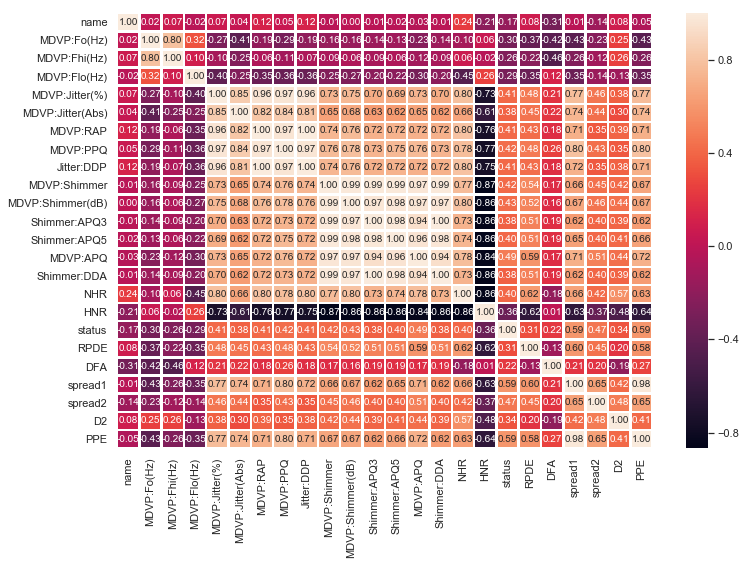

In [78]:
corr = data.corr()

f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

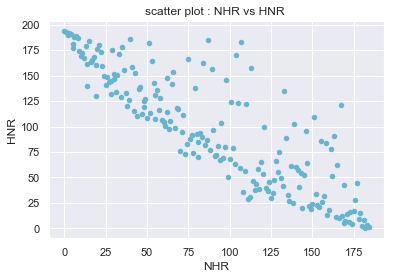

In [79]:
# use scatter plot for bi-variate distribution
data.plot.scatter(x='NHR', y='HNR', color='c', title='scatter plot : NHR vs HNR ');

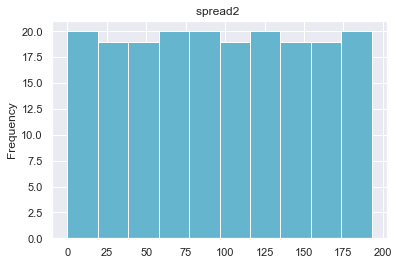

In [81]:
data.spread2.plot(kind='hist', title='spread2 ', color='c');

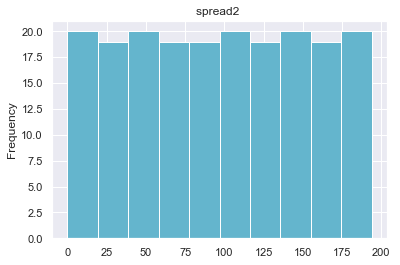

In [80]:
data.spread1.plot(kind='hist', title='spread2 ', color='c');

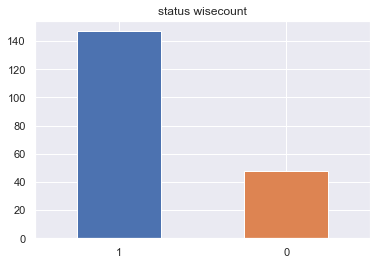

In [23]:
data.status.value_counts().plot(kind="bar",rot = 0, title='status wisecount')

The class is imbalance. So, we need to balance

In [16]:
#Dropping the name column
df = data.drop(labels = "name", axis = 1)
df.head(2)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)    ...     \
0   0.00370   0.00554     0.01109       0.04374             0.426    ...      
1   0.00465   0.00696     0.01394       0.06134             0.626    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  

[2 rows x 23 columns]

In [17]:
y=df["status"]

In [18]:
#Dropping the target column
x = df.drop(labels = "status", axis = 1)

In [20]:
#Scaling
from scipy.stats import zscore
z_data= x.apply(zscore)
z_data.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)    ...     \
0  0.132963  0.760800    0.131755      0.745985          0.739536    ...      
1  0.453892  1.276809    0.452684      1.681731          1.768464    ...      
2  0.720770  1.585687    0.721813      1.202693          1.027636    ...      
3  0.578885  1.284076    0.577677      1.340396          1.207698    ...      
4  1.095750  2.047187    1.096793      1.836448          1.552389    ...      

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1  \
0  0.332985     0.607532 -0.067893 -0.193225 -0.807838  1.760814  0.801323   
1  1.159454     1.548254 -0.137843 -0.634508 -0.387524  1.837562  1.479853   
2  0.699187     1.175323 -0.291633 -0.279760 -0.662075  1.942048  1.141445   
3  0.806859     1.340229 -0.280719 -0.281346 -0.613134  1.832380  1.440945   
4  1.216839     1.899461 -0.178026 -0.506745 -0.783021  1.909364  1.780940   

    spread2        D2       PPE  
0  0.480477 -0.210531  0.868886  
1  1.311185  0.275077  1.803605  
2  1.017682 -0.103629  1.402661  
3  1.293840  0.062145  1.806954  
4  0.096195 -0.130026  2.267082  

[5 rows x 22 columns]

In [24]:
#Balancing the status column to get unbiased results
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=40)
x_res, y_res=smote.fit_sample(z_data, y)

In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

Before OverSampling, counts of label '1': 147
Before OverSampling, counts of label '0': 48 



In [31]:
print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

After OverSampling, counts of label '1': 147
After OverSampling, counts of label '0': 147


In [21]:
#importing packages
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=0)

In [33]:
#lets use decision tree
DTClassifier= DecisionTreeClassifier (max_depth=9, min_samples_split =3,criterion='gini',min_samples_leaf=9)
DTClassifier.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
predicted_labels = DTClassifier.predict(X_test)

In [35]:
model_score = DTClassifier.score(X_test, y_test)
print(model_score)

0.8539325842696629


In [64]:
# Naive Bayees
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("1. Accuracy: ", str(metrics.accuracy_score(y_test,y_pred) * 100) + "%")
print()

print("2. Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

1. Accuracy:  82.02247191011236%

2. Confusion Matrix: 
[[47  2]
 [14 26]]


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85        49
           1       0.93      0.65      0.76        40

   micro avg       0.82      0.82      0.82        89
   macro avg       0.85      0.80      0.81        89
weighted avg       0.84      0.82      0.81        89



Recall for 1 is very low that means it can't detect the disesased person has disease

In [61]:
# KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors=36,leaf_size=5, metric='minkowski',p=1)
KNN.fit(X_train,y_train)
predicted_labels = KNN.predict(X_test)
accuracy_score_knn= accuracy_score(y_test, predicted_labels)
print(accuracy_score_knn)


0.8314606741573034


In [63]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        49
           1       0.88      0.72      0.79        40

   micro avg       0.83      0.83      0.83        89
   macro avg       0.84      0.82      0.83        89
weighted avg       0.84      0.83      0.83        89



#### Recall is signifcantly higher for 1

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
all_var=model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.7528089887640449


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85        49
           1       0.93      0.65      0.76        40

   micro avg       0.82      0.82      0.82        89
   macro avg       0.85      0.80      0.81        89
weighted avg       0.84      0.82      0.81        89



Recall for 1 is very low

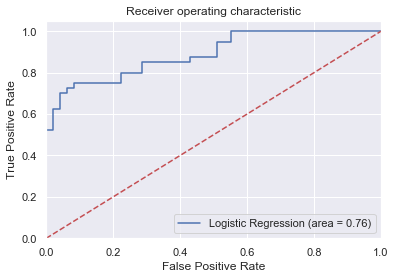

In [44]:
#ROC
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Logistic regression giving low accuracy because of multicolinearity. KNN is our best option over NaiveeBayees because of accuracy and learning. Though the DecisionTree gives best accuracy it may overfit

# c)	Optimize the model (best model picked in ‘b’) with boosting technique and observe the validation score.

Unfortunately, we cannot use any base estimator with AdaBoostClassifier. Only those that support a "sample_weight" fit argument are allowed

In [75]:
# Using Ada boosting  Classifier
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1, algorithm='SAMME')
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, y_train)
test_pred = abcl.predict(X_test)
abcl.score(X_test , y_test)

0.898876404494382

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(abcl,X_train,y_train,cv=5)
print(scores)

[0.92857143 0.88095238 0.90243902 0.95       0.9       ]


Different validations doesn't change accuracy significantlt that means it is normalised i.e reliable

# d)	Comment on (c), whether boosting is improving the model performance or not.

#### Yes, boosting is definetly increasing the model performance and it is normalised so there is low variance and bias

# e)	Optimize the model (best model picked in ‘b’) with bagging technique and observe the validation score.

In [87]:
#base_estimator=KNN

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [85]:
#bagging
bgcl = BaggingClassifier(base_estimator=KNN, n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print("bgcl on test data ", bgcl.score(X_test,y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.8780487804878049
bgcl on test data  0.8426966292134831
out of bag score 0.8634146341463415


In [86]:
scores = cross_val_score(bgcl,X_train,y_train,cv=10)
print(scores)

[0.85714286 0.85714286 0.66666667 0.85714286 0.85714286 0.85714286
 0.9047619  0.85       0.73684211 0.94736842]


Here also scores doesnt vary much

# f)	Comment on (e), whether bagging is improving the model performance or not.

#### Yes, absolutly bagging is improving model performance and giving high accuracy by optimising the variance and bias

# g)	Compare and Contrast both bagging and booting technique over the best model selected during the step ‘b’ with Bias and Variance Error using 5-fold Cross Validation Score.

In [57]:
scores = cross_val_score(KNN,X_train,y_train,cv=5)
print(scores)

[0.85714286 0.76190476 0.87804878 0.85       0.775     ]


#### Although both bagging and boosting give similar result i would prefer to go with bagging as it doesn't voilate the ensemble rules like boosting i.e it carry previous error to make next set of values. Bagging also optimises the bias and variance error significantly. And as KNN is lazy learner and has preferably effected with both bias and variance error it can't perform well.

# h)	Give your final inference, which optimization technique (Bagging/Boosting) would be chosen while the best model picked in step ‘b’, is going for production system.

#### So, we would better go with bagging with KNN for production as it gives reliable accuracy, optimised bias and variance